# Obtaining data - csv/excel

Announcements:
1. Problem set 1 grades posted soon!
2. Problem set 3 released after class
3. Stuff due at end of the week: Problem set 3, Quiz 3, and Discussion board post 1
4. Adnan speaking on Wednesday at 6:00pm
5. Brendon's video on IDEs posted 

Today's topics
1.   Loading csv, excel data
2.   Saving csv, excel data
3.   Websites with data
4.   Brief intro web scraping

So far, we've talked about how to manipulate data, using numpy and pandas, and how to visualize that data, using matplotlib and seaborn

But I'm using pretty convenient datasets. If you work in a psychology lab, your data may be stored as excel, csv, or text files.

Let's talk about a little bit about loading and saving these kinds of datasets.

First, let's import some of our normal libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Now, let's import some data I collected during my postdoc fellowship.

This is eye tracking data of someone driving in a driving simulator.

In [ ]:
eye_track = pd.read_csv('eyetracking_data.txt')
eye_track.head()

,Var1 Var2 Var3
0,1.44207587271361 0.0232338115794249 151.138258...
1,1.39027874910719 0.0218304931830517 151.154917...
2,1.48176710656607 0.0237724495233521 151.171574...
3,1.25546497074573 0.0206526507526711 151.188233...
4,1.5483807587008 0.0231691147836626 151.2048945...


Huh. That looks strange

We probably need to specify how the numbers are separated. This is called the delimiter

In [ ]:
eye_track = pd.read_csv('eyetracking_data.txt',delimiter=' ')
eye_track.head()

,Var1,Var2,Var3
0,1.442076,0.023234,151.138258
1,1.390279,0.021830,151.154917
2,1.481767,0.023772,151.171575
3,1.255465,0.020653,151.188234
4,1.548381,0.023169,151.204895


In this particular dataset, spaces were used. However, commas are commonly used. So are tabs

So... let's get back to the data

Jeez. The columns aren't even labelled. Ugh

We can rename them with rename

In [ ]:
eye_track.rename(columns = {'Var1':'x','Var2':'y','Var3':'t'}) 
eye_track.head()

,Var1,Var2,Var3
0,1.442076,0.023234,151.138258
1,1.390279,0.021830,151.154917
2,1.481767,0.023772,151.171575
3,1.255465,0.020653,151.188234
4,1.548381,0.023169,151.204895


Or by setting the columns of the dataframe equal to a list. Note that a list with more entries than possible will crash

In [ ]:
eye_track.columns = ['X','Y','Time']
eye_track.head()

,X,Y,Time
0,1.442076,0.023234,151.138258
1,1.390279,0.021830,151.154917
2,1.481767,0.023772,151.171575
3,1.255465,0.020653,151.188234
4,1.548381,0.023169,151.204895


Let's take a quick peek at the data. Looks pretty messy. 

This is one limitation of these quick plotting methods. Sometimes, they don't look good at all!

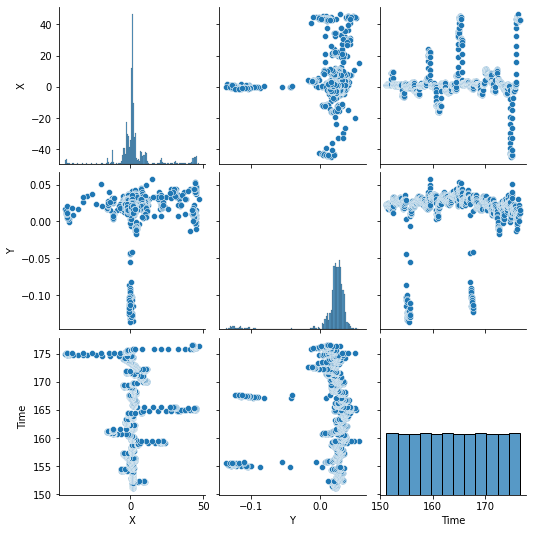

In [ ]:
sns.pairplot(eye_track)

Since I'm familiar with the data, I can tell you the best way to look at this data is to plot time on the x-axis and X and Y eccentricity on the y-axes

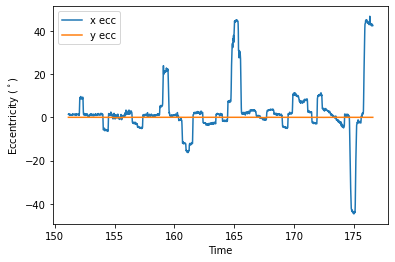

In [ ]:
sns.lineplot(x='Time',y='X',data=eye_track,label='x ecc')
sns.lineplot(x='Time',y='Y',data=eye_track,label='y ecc')
plt.ylabel('Eccentricity ($^\circ$)')
plt.legend()

Huh. Looks like the X data is in degrees and Y data is in radians

In [ ]:
eye_track['Y'] = np.degrees(eye_track['Y'])
eye_track.head()

,X,Y,Time
0,1.442076,1.331199,151.138258
1,1.390279,1.250795,151.154917
2,1.481767,1.362061,151.171575
3,1.255465,1.183310,151.188234
4,1.548381,1.327492,151.204895


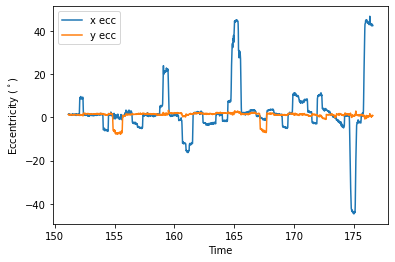

In [ ]:
sns.lineplot(x='Time',y='X',data=eye_track,label='x ecc')
sns.lineplot(x='Time',y='Y',data=eye_track,label='y ecc')
plt.ylabel('Eccentricity ($^\circ$)')
plt.legend()

Good. Much better. I think we have improved this dataset! Let's save it now

In [ ]:
eye_track.to_csv('new_eyetracking_data.csv')

We can change the delimiter with sep

In [ ]:
eye_track.to_csv('new_eyetracking_data2.csv',sep=',')

Saving and loading excel file data is very similar to how CSV data is handled

Lets save the data as an excel file to see how it work


In [ ]:
eye_track.to_excel('new_eyetracking_data.xlsx')

Now, let's load that excel file

In [ ]:
excel_eye_track = pd.read_excel('new_eyetracking_data.xlsx')

In [ ]:
excel_eye_track.head()

,Unnamed: 0,X,Y,Time
0,0,1.442076,1.331199,151.138258
1,1,1.390279,1.250795,151.154917
2,2,1.481767,1.362061,151.171575
3,3,1.255465,1.183310,151.188234
4,4,1.548381,1.327492,151.204895


Weird. Now there is an extra column at the beginning.

Any idea what this column may be from?

The indices of the dataframe have been saved in the excel file, which then get loaded when we load that excel file

We can include an argument if we know there is an index column. We could do this with the csv file as well

In [ ]:
excel_eye_track2 = pd.read_excel('new_eyetracking_data.xlsx',index_col=0)
excel_eye_track2.head()

,X,Y,Time
0,1.442076,1.331199,151.138258
1,1.390279,1.250795,151.154917
2,1.481767,1.362061,151.171575
3,1.255465,1.183310,151.188234
4,1.548381,1.327492,151.204895


Alternatively, you could load the whole data set, and then just drop that column

In [ ]:
excel_eye_track3 = pd.read_excel('new_eyetracking_data.xlsx')
excel_eye_track3.columns

Index(['Unnamed: 0', 'X', 'Y', 'Time'], dtype='object')

In [ ]:
excel_eye_track3.drop(columns='Unnamed: 0',inplace=True)
excel_eye_track3.head()

,X,Y,Time
0,1.442076,1.331199,151.138258
1,1.390279,1.250795,151.154917
2,1.481767,1.362061,151.171575
3,1.255465,1.183310,151.188234
4,1.548381,1.327492,151.204895


Let's just load one last dataset.

In [ ]:
drive_sim = pd.read_csv('drivesim_data.csv')
drive_sim.head()

,0957bn,1.086111167,1.618181818,1.308333342,1.058333308
0,2176as,1.708333,1.645454,2.912121,0.930556
1,2221ee,1.788889,2.566667,1.439394,2.041667
2,2437mg,2.494445,1.839394,2.830303,1.566667
3,3242ay,1.061111,1.581818,1.258333,1.780555
4,3243we,0.830556,1.030303,0.961111,0.805556


Data looks to be loaded okay, but the column labels appear to be messed up. 

In this case, it looks like there were no headers in the csv file. So, let's make sure that when we load them into colab, we have name the columns

If you tried to just rename the columns, you will lose that first row of data! So, lets' add columns as input arguments into the pd.read_csv function

In [ ]:
drive_sim = pd.read_csv('drivesim_data.csv',names=['Subject','D1','D2','D3','D4'])
drive_sim.head()

,Subject,D1,D2,D3,D4
0,0957bn,1.086111,1.618182,1.308333,1.058333
1,2176as,1.708333,1.645454,2.912121,0.930556
2,2221ee,1.788889,2.566667,1.439394,2.041667
3,2437mg,2.494445,1.839394,2.830303,1.566667
4,3242ay,1.061111,1.581818,1.258333,1.780555


Maybe we want the rows to be the subject, since that is actually what the rows represent

In [ ]:
drive_sim.index = drive_sim['Subject']
drive_sim.head()

,Subject,D1,D2,D3,D4
Subject,,,,,
0957bn,0957bn,1.086111,1.618182,1.308333,1.058333
2176as,2176as,1.708333,1.645454,2.912121,0.930556
2221ee,2221ee,1.788889,2.566667,1.439394,2.041667
2437mg,2437mg,2.494445,1.839394,2.830303,1.566667
3242ay,3242ay,1.061111,1.581818,1.258333,1.780555


Now, let's just drop that first column

In [ ]:
drive_sim.drop(columns='Subject',inplace=True)
drive_sim.head()

,D1,D2,D3,D4
Subject,,,,
0957bn,1.086111,1.618182,1.308333,1.058333
2176as,1.708333,1.645454,2.912121,0.930556
2221ee,1.788889,2.566667,1.439394,2.041667
2437mg,2.494445,1.839394,2.830303,1.566667
3242ay,1.061111,1.581818,1.258333,1.780555


Now with these few lines of code, you should be able to interact with data from your lab. 

Note that there is a csv library. https://docs.python.org/3/library/csv.html Perhaps there are limitations to pandas that don't exist in the csv library. I'm not sure of any at the moment, but its something to be aware of.

Regarding csv/excel file data, you can also download excel/csv data from websites that store data. For example, https://www.kaggle.com/ is a great place to find data. 

So, we've created fake data, downloaded datasets using seaborn, and we have learned how to import and export CSVs and Excel files. 

The last method of obtaining data that we will talk about is web scraping. Web scraping means extracting data from a website and saving it onto your ocmputer

The simplest form of webscraping is to utilize pandas read_html method

read_html takes in an html and then searches for tables in that html

Let's first see an example, then we will spend the next couple of lectures exploring exactly how this works

In [ ]:
webdata = pd.read_html('https://en.wikipedia.org/wiki/List_of_cities_by_elevation')

In [ ]:
print(type(webdata),len(webdata))


<class 'list'> 2


Data is a list that has a length of 2

The first two items in the list are not the table we wanted


In [ ]:
webdata[0]

,0,1
0,NaN,This article needs additional citations for ve...


However, the third item in the list is the table

In [ ]:
webdata[1]

,Country/Territory,City Name/s,Continental Region,Latitude,Longitude,Population,Elevation (m)
0,South Africa,Bloemfontein,Africa,S29.116667,E026.216667,747431.0,1395
1,India,Bangalore,Asia,N12.97,E77.59,8430000.0,920
2,India,Chennai,Asia,N13.0827,E80.2707,7088000.0,6
3,India,Hyderabad,Asia,N17.37,E78.48,6809970.0,542
4,Italy,Milan,Europe,N45.4625,E9.186389,1378689.0,122
...,...,...,...,...,...,...,...
184,Western Sahara (MA),Laayoune / El Aaiun,Africa,N27.1536,W013.2033,NaN,72
185,Australia,Canberra,Oceania,S35.2820,E149.1286,NaN,605
186,New Zealand,Wellington,Oceania,S41.2865,E174.7762,NaN,20
187,Papua New Guinea,Port Moresby,Oceania,S09.4656,E147.1969,NaN,39


Why is this happening? Well, we need to look at the html code to understand that.

read_html is looking for specific formating in the html code. Specifically, <_table> content and only for <_tr> and <_th> rows and <_td> elements within each <_tr> or <_th> element in the table

When we look at the html, we see that there are three tables in the html, which is why it spit out three





Now, let's look back at our webdata 

In [ ]:
print(type(webdata))

<class 'list'>


So, in order to access that information, we need the type to be a tag, not a ....

In [ ]:
print(type(webdata[1]))

<class 'pandas.core.frame.DataFrame'>



So, while this is probably the easist method to web scrap, it has its limitations. 

What do you think would happen if we checked out this website? I want to pull off some recipes from Babish

In [ ]:
url2 = 'https://www.bingingwithbabish.com/recipes'
data = pd.read_html(url2)

ValueError: ignored

Oh weird. It doesn't work.

Let's check error message. Very interesting. Let's check the the website. Oh. There are not tables in this html code.

So, how do we scrap then? We can use beautiful soup. 

https://scrapinghub.com/guides/web-scraping-best-practices/